## Shortest path planning

example from motion planning course offered by Univ of Toronto

A map of Berkley, California is given
* Implement Dijkstra's search algorithm on a road network graph.
* Implement the A* search algorithm using a Euclidean heuristic on a road network graph. 

[OSMNX library](https://osmnx.readthedocs.io/en/stable/) is used to generate Python graphs from Open Street Map (OSM) data.  

In [ ]:
!pip install osmnx

In [ ]:
import osmnx as ox
import networkx as nx
import numpy as np
from sklearn.neighbors import KDTree 

We are going to local path planning in Berkeley, California, between the two nodes given below. After running the code up to and including the box below, you should see the output of the shortest path between the two points. 

In [ ]:
#from https://github.com/sidmitra/osmnx_playground

# dist = 4*805 # radius in meters(approx 2 miles)
dist = 2*805
places = [
    ['delhi', (28.632821, 77.219459)], 
    ['mumbai', (18.932018, 72.834971)], 
    ['kolkatta', (22.566929, 88.347260)], 
    ['chennai', (13.080271, 80.284657)], 
    ['bengaluru', (12.977830, 77.593817)], 
    ['hyderabad', (17.366103, 78.469492)], 
    ['ahmedabad', (23.026948, 72.574903)], 
    ['jaipur', (26.907290, 75.805467)], 
    ['chandigarh', (30.732453, 76.772294)],
    ['pune', (18.519708, 73.856646)],
    ['lucknow', (26.845984, 80.946011)],
    ['gandhinagar', (23.224847, 72.646416)],   
]

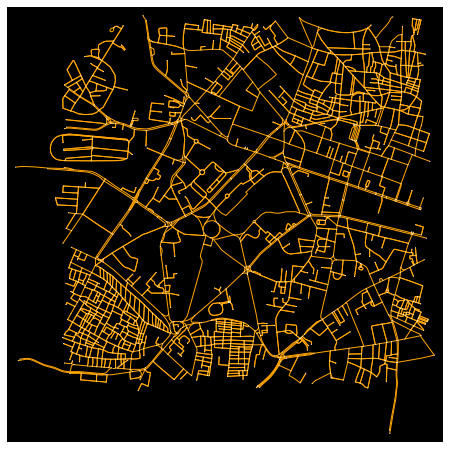

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [ ]:
name, point = places[4]
nt = 'drive_service'
G = ox.graph_from_point(point, dist=dist,dist_type="bbox", network_type=nt, truncate_by_edge=True)
ox.plot_graph(G, node_size=1, edge_color='orange', bgcolor='#000000', show=True)

Print the edges and nodes of this graph

In [ ]:
print(len(G.edges))
print(len(G.nodes))
# G.nodes

4250
1763


Arbitrarily select the first node and last node in the Graph and find the shortest path

In [ ]:
origin = list(G.nodes)[20] 
destination = list(G.nodes)[100]
shortest_path = nx.shortest_path(G,origin,destination)


Now visualize using plot_graph_route

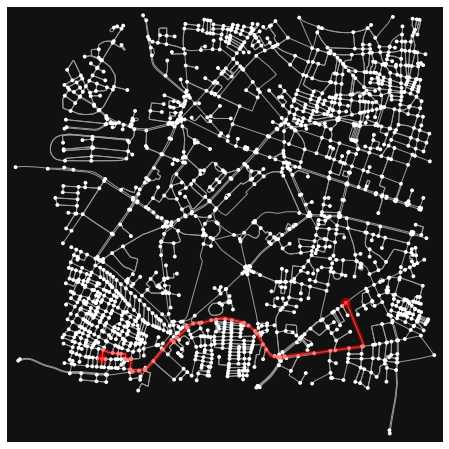

In [ ]:
fig, ax = ox.plot_graph_route(G,shortest_path,route_color='r')

In [ ]:
# Problem adapted from Introduction to AI, U of Toronto
# https://github.com/booklover98/A-star-Pathfinding

oshawa = (43.945403, -78.892466)
G = ox.graph_from_point(oshawa, dist=2000)
start = ox.geocode('2000 Simcoe St N, Oshawa, Ontario')
end = ox.geocode('18 Niagara Dr, Oshawa, Ontario')

#Convert the graph into geopandas dataframe
# easy to query closest node etc
nodes, _ = ox.graph_to_gdfs(G)
nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
278589216,43.928847,-78.874744,3,NaN,POINT (-78.87474 43.92885)
278589217,43.928758,-78.874863,3,NaN,POINT (-78.87486 43.92876)
278589220,43.928360,-78.877049,3,NaN,POINT (-78.87705 43.92836)
278589616,43.950166,-78.885872,3,NaN,POINT (-78.88587 43.95017)
278589617,43.949039,-78.885790,3,NaN,POINT (-78.88579 43.94904)


In [ ]:
nodes['cordinates'] = nodes.apply(lambda row : [row['y'],row['x']] , axis=1) # lat,long
locations = np.array(list(nodes['cordinates']))

In [ ]:
tree = KDTree(locations,metric='euclidean')

start_idx = tree.query([start],k=1,return_distance=False)[0]
end_idx = tree.query([end], k=1,return_distance=False)[0]

closest_start_node = nodes.iloc[start_idx]
closest_end_node = nodes.iloc[end_idx]

#retrieve origin and destination node id

origin = closest_start_node.index.values[0]
destination = closest_end_node.index.values[0] 

# shortest path between source and destination
shortest_path = nx.shortest_path(G,origin,destination)


Visualize the shortest path and graph

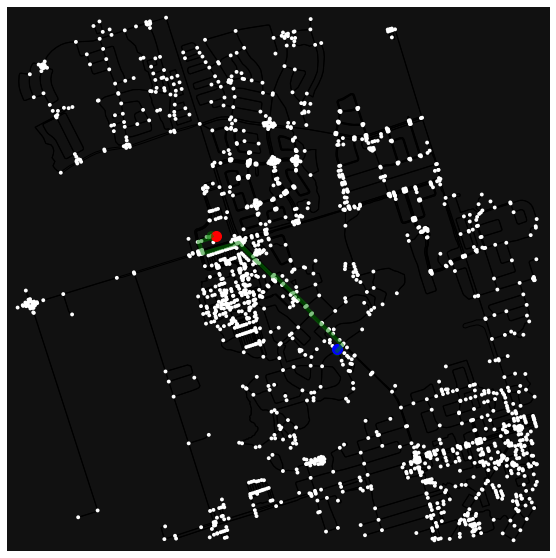

In [ ]:
#plot graph with geocodes and nodes
fig, ax = ox.plot_graph_route(G, shortest_path, figsize=(10,10), show=False, close=False, edge_color='black', route_color='green')
ax.scatter(start[1], start[0], c='red', s=100)
ax.scatter(end[1], end[0], c='blue', s=100)
ax.scatter(closest_start_node['y'], closest_start_node['x'], c='green', s=100)
ax.scatter(closest_end_node['y'], closest_end_node['x'], c='green', s=100)

Use these ideas to find shortest path between 2 addresses/ geocodes in an Indian city of your choice 

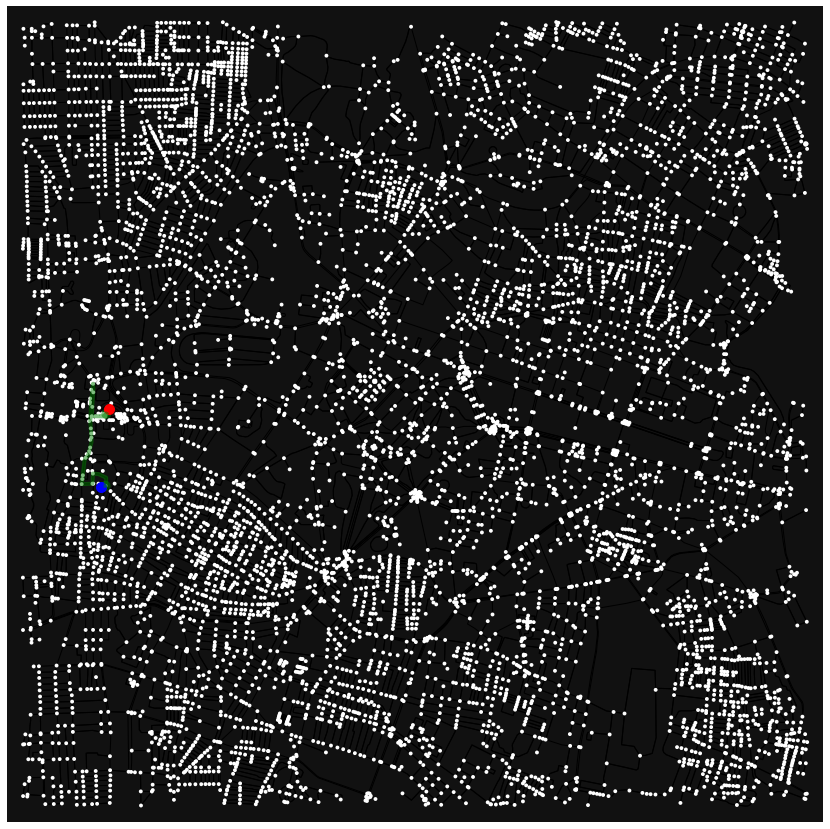

In [ ]:
bengaluru = (12.977830, 77.593817)
G = ox.graph_from_point(bengaluru, dist=3000)
start = ox.geocode('majestic, bangalore, karnataka 560058')
end = ox.geocode('majestic railway station, bengaluru, karnataka 560011')

#Convert the graph into geopandas dataframe
# easy to query closest node etc
nodes, _ = ox.graph_to_gdfs(G)
nodes['cordinates'] = nodes.apply(lambda row : [row['y'],row['x']] , axis=1) # lat,long
locations = np.array(list(nodes['cordinates']))

tree = KDTree(locations,metric='euclidean')

start_idx = tree.query([start],k=1,return_distance=False)[0]
end_idx = tree.query([end], k=1,return_distance=False)[0]

closest_start_node = nodes.iloc[start_idx]
closest_end_node = nodes.iloc[end_idx]

#retrieve origin and destination node id

origin = closest_start_node.index.values[0]
destination = closest_end_node.index.values[0] 

# shortest path between source and destination
shortest_path = nx.shortest_path(G,origin,destination)

#plot graph with geocodes and nodes
fig, ax = ox.plot_graph_route(G, shortest_path, figsize=(15,15), show=False, close=False, edge_color='black', route_color='green')
ax.scatter(start[1], start[0], c='red', s=100)
ax.scatter(end[1], end[0], c='blue', s=100)
ax.scatter(closest_start_node['y'], closest_start_node['x'], c='green', s=100)
ax.scatter(closest_end_node['y'], closest_end_node['x'], c='green', s=100)